In [1]:
import geopandas as gp

In [3]:
gdf= gp.read_file("shape/usgs_q_stations.shp")

<AxesSubplot:>

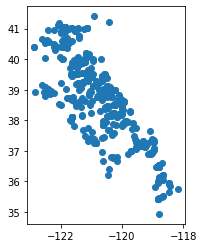

In [4]:
gdf.plot()

<AxesSubplot:>

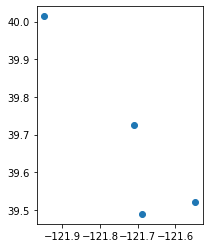

In [8]:
stn_list = [11383500,11390000,11406900,11407000]
stns = [str(x) for x in stn_list]

gdf[gdf['ID'].isin(stns)].plot()

<AxesSubplot:>

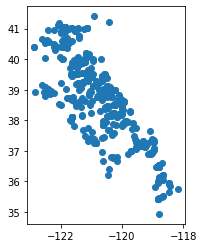

In [10]:
gdf.plot()

In [11]:
import climata

In [ ]:
climata.SiteIO(NwisLoader, RdbParser, TupleMapper, BaseIO):
    """
    Loads USGS site metadata from NWIS webservices (via RDB format).
    Usage:
        site_params = SiteIO(basin='02070010')
        for site_param in site_params:
            print site_param.site_no, site_param.parm_cd, site_param.end_date
    """

    service = "site"
    default_params = {
        'format': 'rdb,1.0',
        'outputDataTypeCd': 'all',
        'siteStatus': 'active',
    }


In [12]:
from climata.usgs import StationDataIO



ImportError: cannot import name 'StationDataIO' from 'climata.usgs' (/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/climata/usgs/__init__.py)

In [14]:
climata.usgs

<module 'climata.usgs' from '/Users/aakashahamed/anaconda3/envs/rsenv/lib/python3.8/site-packages/climata/usgs/__init__.py'>

In [ ]:
def get_streamflow(huc8):
	'''
	for a huc8 (e.g. 18020162), call climata api and get streamflow for all stations within boundary
	'''
	
	data =  DailyValueIO (
			start_date="1997-01-01", 
			end_date="2021-01-01",
			basin=huc8,
			parameter="00060",
			)
	
	qs = []
	ds = []
	lats = []
	lons = []
	ids = []

	for series in data:
		values = []
		dates = []
		lats.append(series.latitude)
		lons.append(series.longitude)
		ids.append(series.site_code)

		for row in series.data:
			values.append(row.value)
			dates.append(row.date)

		qs.append(values)
		ds.append(dates)
	
	geometry = [Point(xy) for xy in zip(lons, lats)]
	df = pd.DataFrame(geometry)
	crs = {'init': 'epsg:4326'}
	gdf = gp.GeoDataFrame(df, crs=crs, geometry=geometry)
	
	return gdf, qs, ds, ids